In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Importing dataset
train = pd.read_csv("../input/series/series.csv").fillna(0)
train.head()
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [3]:
train

,Date,Visits
0,01-07-2015,18
1,02-07-2015,11
2,03-07-2015,5
3,04-07-2015,13
4,05-07-2015,14
...,...,...
545,27-12-2016,20
546,28-12-2016,22
547,29-12-2016,19
548,30-12-2016,18


In [4]:
#Using Data From Random Row for Training and Testing

row = sc.fit_transform(train.iloc[:,1].values.reshape(-1,1))
X = row[0:543]
y = row[7:550]
X = np.c_[X,row[1:544],row[2:545],row[3:546],row[4:547],row[5:548],row[6:549]]

In [5]:
X.shape

(543, 7)

In [6]:
X[:529,:].shape

(529, 7)

In [7]:
X[529:,:].shape

(14, 7)

In [8]:
X_train = X[:529,:]
X_test  = X[529:,:]
y_train = y[:529,:]
y_test  = y[529:,:]

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(529, 7)
(14, 7)
(529, 1)
(14, 1)


In [10]:
# # Splitting the dataset into the Training set and Test set
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.092, random_state = 0,shuffle=False)

# X_train 

In [11]:
X_train.shape

(529, 7)

In [12]:
X_train.reshape(-1,7,1)

array([[[0.03080082],
        [0.0164271 ],
        [0.00410678],
        ...,
        [0.02258727],
        [0.01232033],
        [0.01232033]],

       [[0.0164271 ],
        [0.00410678],
        [0.02053388],
        ...,
        [0.01232033],
        [0.01232033],
        [0.03901437]],

       [[0.00410678],
        [0.02053388],
        [0.02258727],
        ...,
        [0.01232033],
        [0.03901437],
        [0.04722793]],

       ...,

       [[0.02669405],
        [0.02258727],
        [0.0349076 ],
        ...,
        [0.03901437],
        [0.02464066],
        [0.02874743]],

       [[0.02258727],
        [0.0349076 ],
        [0.11704312],
        ...,
        [0.02464066],
        [0.02874743],
        [0.03285421]],

       [[0.0349076 ],
        [0.11704312],
        [0.03901437],
        ...,
        [0.02874743],
        [0.03285421],
        [0.03080082]]])

In [13]:
#Training LSTM

#Reshaping Array
X_train = np.reshape(X_train, (X_train.shape[0],7,1))


# Importing the Keras libraries and packages for LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layerand the LSTM layer
regressor.add(LSTM(units = 6, activation = 'tanh', input_shape = (7,1)))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.summary()

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 10, epochs = 1300, verbose = 0)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6)                 192       
_________________________________________________________________
dense (Dense)                (None, 1)                 7         
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Getting the predicted Web View
inputs = X_test
# inputs = np.reshape(inputs,(-1,1))
# inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (X_test.shape[0],7 , 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

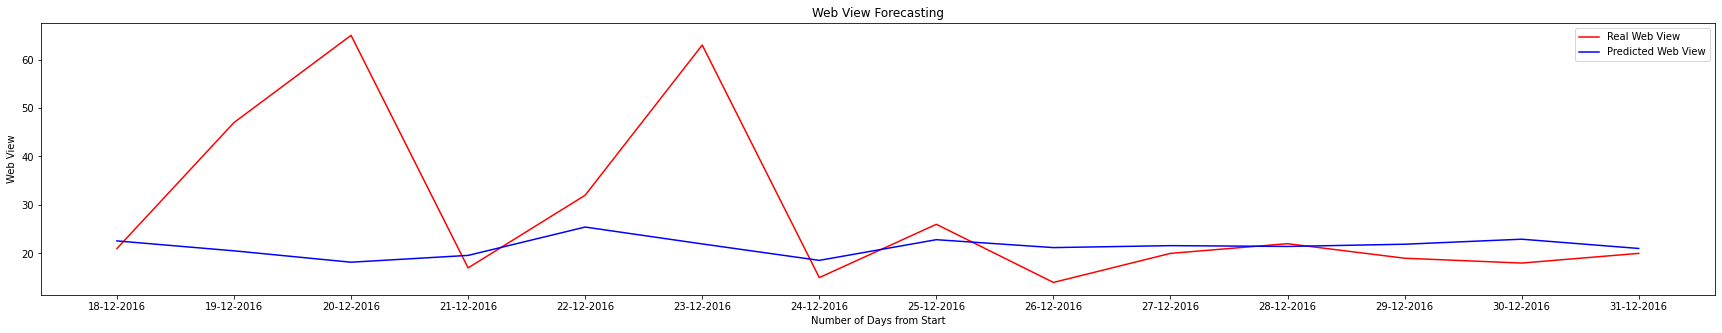

In [15]:
#Visualising Result
plt.figure(figsize=(30, 5))
plt.plot(train.Date[-X_test.shape[0]:],train.Visits[-X_test.shape[0]:], color = 'red', label = 'Real Web View')
plt.plot(train.Date[-X_test.shape[0]:],y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, sc.inverse_transform(y_test),squared=False)

18.40357939861306

In [17]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [18]:
mean_absolute_percentage_error(sc.inverse_transform(y_test),y_pred)

27.30188402277441

In [19]:
#As you can see the prediction is quite accurate for a test set. Now repeat this for some other rows

In [20]:
row = train.iloc[0,:].values
X = row[0:549]
y = row[1:550]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)



# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = np.reshape(X_train,(-1,1))
y_train = np.reshape(y_train,(-1,1))
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

#Training LSTM

#Reshaping Array
X_train = np.reshape(X_train, (384,1,1))


# Importing the Keras libraries and packages for LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layerand the LSTM layer
regressor.add(LSTM(units = 8, activation = 'relu', input_shape = (None, 1)))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 0)

# Getting the predicted Web View
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (165, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [2, 1]

In [21]:
row = train.iloc[10,:].values
X = row[0:549]
y = row[1:550]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)



# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = np.reshape(X_train,(-1,1))
y_train = np.reshape(y_train,(-1,1))
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

#Training LSTM

#Reshaping Array
X_train = np.reshape(X_train, (384,1,1))


# Importing the Keras libraries and packages for LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layerand the LSTM layer
regressor.add(LSTM(units = 8, activation = 'relu', input_shape = (None, 1)))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 0)

# Getting the predicted Web View
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (165, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [2, 1]

In [22]:
row = train.iloc[100,:].values
X = row[0:549]
y = row[1:550]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)



# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = np.reshape(X_train,(-1,1))
y_train = np.reshape(y_train,(-1,1))
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

#Training LSTM

#Reshaping Array
X_train = np.reshape(X_train, (384,1,1))


# Importing the Keras libraries and packages for LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layerand the LSTM layer
regressor.add(LSTM(units = 8, activation = 'relu', input_shape = (None, 1)))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 0)

# Getting the predicted Web View
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (165, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [2, 1]

In [23]:
row = train.iloc[1000,:].values
X = row[0:549]
y = row[1:550]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)



# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = np.reshape(X_train,(-1,1))
y_train = np.reshape(y_train,(-1,1))
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

#Training LSTM

#Reshaping Array
X_train = np.reshape(X_train, (384,1,1))


# Importing the Keras libraries and packages for LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layerand the LSTM layer
regressor.add(LSTM(units = 8, activation = 'relu', input_shape = (None, 1)))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 0)

# Getting the predicted Web View
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (165, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

IndexError: single positional indexer is out-of-bounds

In [24]:
#Now lets train on one page and test on another page
train_row = train.iloc[90000,:].values
X = train_row[0:549]
y = train_row[1:550]


# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = np.reshape(X,(-1,1))
y_train = np.reshape(y,(-1,1))
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

#Training LSTM

#Reshaping Array
X_train = np.reshape(X_train, (549,1,1))


# Importing the Keras libraries and packages for LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layerand the LSTM layer
regressor.add(LSTM(units = 8, activation = 'relu', input_shape = (None, 1)))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 0)

# Getting the predicted Web View
test_row = train.iloc[10000,:].values
X_test = test_row[0:549]
y_test = test_row[1:550]
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (549, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

IndexError: single positional indexer is out-of-bounds

In [25]:
#Repeating on another page
# Getting the predicted Web View
test_row = train.iloc[5000,:].values
X_test = test_row[0:549]
y_test = test_row[1:550]
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (549, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

IndexError: single positional indexer is out-of-bounds

In [26]:
# Getting the predicted Web View
import random
X_value = random.randint(0,train.shape[0])
test_row = train.iloc[X_value,:].values
X_test = test_row[0:549]
y_test = test_row[1:550]
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (549, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting for')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

ValueError: could not convert string to float: '10-04-2016'

In [27]:
# Getting the predicted Web View
import random
X_value = random.randint(0,train.shape[0])
test_row = train.iloc[X_value,:].values
X_test = test_row[0:549]
y_test = test_row[1:550]
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (549, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting for')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

ValueError: could not convert string to float: '05-01-2016'

In [28]:
# Getting the predicted Web View
import random
X_value = random.randint(0,train.shape[0])
test_row = train.iloc[X_value,:].values
X_test = test_row[0:549]
y_test = test_row[1:550]
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (549, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting for')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

ValueError: could not convert string to float: '14-10-2016'

In [29]:
# Getting the Mean Web View - 1000 Pages
y_test_mean = []
y_pred_mean = []
for X_value in range(0,1000):
    test_row = train.iloc[X_value,:].values
    X_test = test_row[0:549]
    y_test = test_row[1:550]
    y_test_mean.append(np.mean(y_test))
    inputs = X_test
    inputs = np.reshape(inputs,(-1,1))
    inputs = sc.transform(inputs)
    inputs = np.reshape(inputs, (549, 1, 1))
    y_pred = regressor.predict(inputs)
    y_pred = sc.inverse_transform(y_pred)
    y_pred_mean.append(np.mean(y_pred))

ValueError: could not convert string to float: '01-07-2015'

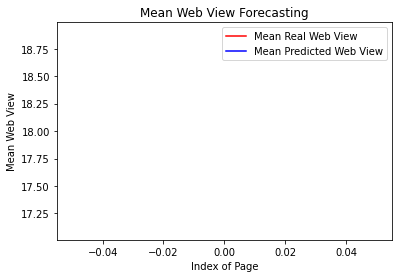

In [30]:
#Visualising mean
plt.figure
plt.plot(y_test_mean, color = 'red', label = 'Mean Real Web View')
plt.plot(y_pred_mean, color = 'blue', label = 'Mean Predicted Web View')
plt.title('Mean Web View Forecasting')
plt.xlabel('Index of Page')
plt.ylabel('Mean Web View')
plt.legend()
plt.show()

In [31]:
# Getting the Mean Web View - 100 Pages
y_test_mean = []
y_pred_mean = []
for X_value in range(0,100):
    test_row = train.iloc[X_value,:].values
    X_test = test_row[0:549]
    y_test = test_row[1:550]
    y_test_mean.append(np.mean(y_test))
    inputs = X_test
    inputs = np.reshape(inputs,(-1,1))
    inputs = sc.transform(inputs)
    inputs = np.reshape(inputs, (549, 1, 1))
    y_pred = regressor.predict(inputs)
    y_pred = sc.inverse_transform(y_pred)
    y_pred_mean.append(np.mean(y_pred))
    
#Visualising mean
plt.figure
plt.plot(y_test_mean, color = 'red', label = 'Mean Real Web View')
plt.plot(y_pred_mean, color = 'blue', label = 'Mean Predicted Web View')
plt.title('Mean Web View Forecasting')
plt.xlabel('Index of Page')
plt.ylabel('Mean Web View')
plt.legend()
plt.show()

ValueError: could not convert string to float: '01-07-2015'

In [32]:
# Getting the Mean Web View - random 100 Pages in between
pages = np.random.randint(0,train.shape[0],100)
y_test_mean = []
y_pred_mean = []
for X_value in pages:
    test_row = train.iloc[X_value,:].values
    X_test = test_row[0:549]
    y_test = test_row[1:550]
    y_test_mean.append(np.mean(y_test))
    inputs = X_test
    inputs = np.reshape(inputs,(-1,1))
    inputs = sc.transform(inputs)
    inputs = np.reshape(inputs, (549, 1, 1))
    y_pred = regressor.predict(inputs)
    y_pred = sc.inverse_transform(y_pred)
    y_pred_mean.append(np.mean(y_pred))
    
#Visualising mean
plt.figure
plt.plot(y_test_mean, color = 'red', label = 'Mean Real Web View')
plt.plot(y_pred_mean, color = 'blue', label = 'Mean Predicted Web View')
plt.title('Mean Web View Forecasting')
plt.ylabel('Mean Web View')
plt.legend()
plt.show()

ValueError: could not convert string to float: '12-11-2016'

In [33]:
# Getting the Mean Web View - random 100 Pages in between
pages = np.random.randint(0,train.shape[0],100)
y_test_mean = []
y_pred_mean = []
for X_value in pages:
    test_row = train.iloc[X_value,:].values
    X_test = test_row[0:549]
    y_test = test_row[1:550]
    y_test_mean.append(np.mean(y_test))
    inputs = X_test
    inputs = np.reshape(inputs,(-1,1))
    inputs = sc.transform(inputs)
    inputs = np.reshape(inputs, (549, 1, 1))
    y_pred = regressor.predict(inputs)
    y_pred = sc.inverse_transform(y_pred)
    y_pred_mean.append(np.mean(y_pred))
    
#Visualising mean
plt.figure
plt.plot(y_test_mean, color = 'red', label = 'Mean Real Web View')
plt.plot(y_pred_mean, color = 'blue', label = 'Mean Predicted Web View')
plt.title('Mean Web View Forecasting')
plt.ylabel('Mean Web View')
plt.legend()
plt.show()

ValueError: could not convert string to float: '13-08-2015'